# Spanish Translation A/B Test
## Goal
A/B tests play a huge role in website optimization. Analyzing A/B tests data is a very important
data scientist responsibility. Especially, data scientists have to make sure that results are
reliable, trustworthy, and conclusions can be drawn.
Furthermore, companies often run tens, if not hundreds, of A/B tests at the same time. Manually
analyzing all of them would require lot of time and people. Therefore, it is common practice to
look at the typical A/B test analysis steps and try to automate as much as possible. This frees
up time for the data scientists to work on more high level topics.
In this challenge, you will have to analyze results from an A/B test. Also, you will be asked to
design an algorithm to automate some steps.
## Challenge Description
Company XYZ is a worldwide e-commerce site with localized versions of the site.
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than
any other Spanish-speaking country. She therefore went and talked to the international team in
charge of Spain And LatAm to see if they had any ideas about why that was happening.
Spain and LatAm country manager suggested that one reason could be translation. All Spanishspeaking
countries had the same translation of the site which was written by a Spaniard. They
agreed to try a test where each country would have its one translation written by a local. That is,
Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican
and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it
appears that the non-localized translation was doing better!
### You are asked to:
Confirm that the test is actually negative. That is, it appears that the old version of the
site with just one translation across Spain and LatAm performs better
Explain why that might be happening. Are the localized translations really worse?
7
Click here to check out our site if interested in a feedback on your solutions, 1:1 mentorship, and more!
If you identified what was wrong, design an algorithm that would return FALSE if the
same problem is happening in the future and TRUE if everything is good and the results
can be trusted.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [16]:
user = pd.read_csv('user_table.csv')

In [17]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [18]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [19]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [20]:
test = pd.read_csv('test_table.csv')

In [21]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [23]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [24]:
data = pd.merge(left=test, right=user, how='left', on='user_id')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 41.5+ MB


In [26]:
country_conversion = data.groupby("country")["conversion"].mean().sort_values(ascending=False)

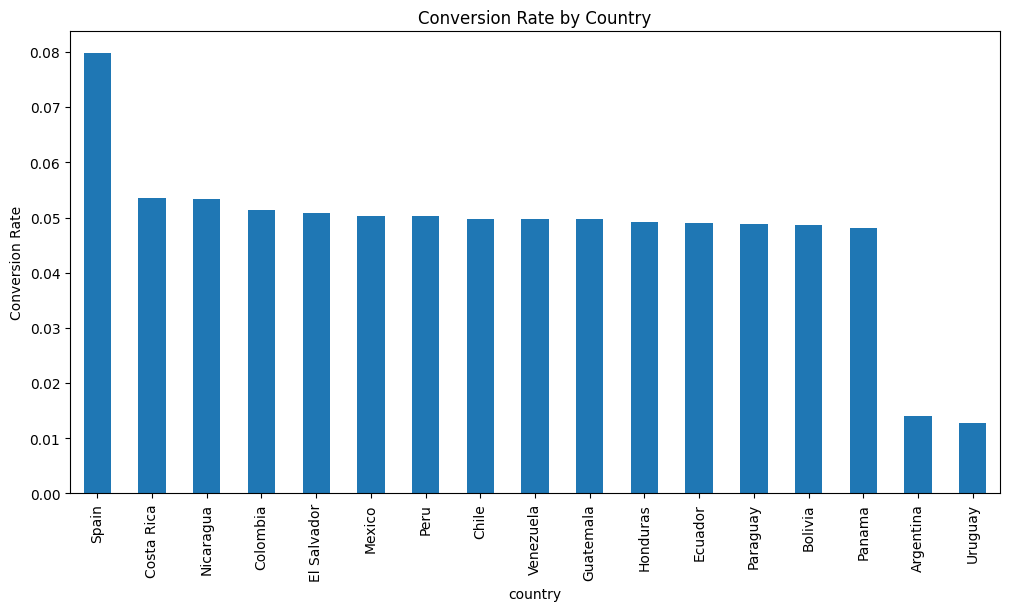

In [27]:
country_conversion.plot(kind="bar", figsize=(12,6))
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Country")
plt.show()

In [28]:
new_data = data[data['country'] != 'Spain']

In [29]:
treatment = new_data.loc[new_data['test'] == 1, "conversion"]

In [30]:
control   = new_data.loc[new_data['test'] == 0, "conversion"]

In [31]:
treat_mean = treatment.mean()

In [32]:
cont_mean  = control.mean()

In [33]:
t_stat, p_val = ttest_ind(treatment, control, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.5f}")

T-statistic: -7.394, P-value: 0.00000


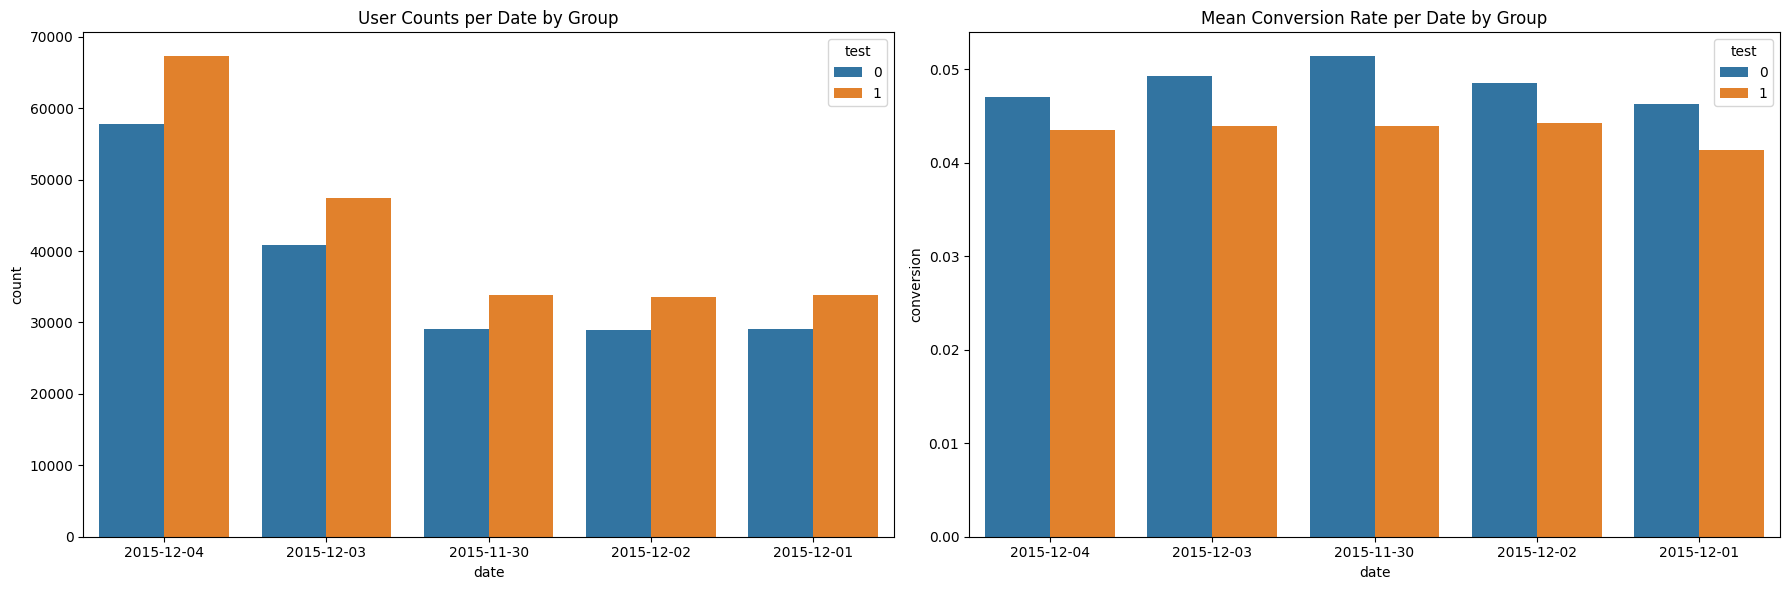

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(data=new_data, x="date", hue="test", ax=axes[0])
axes[0].set_title("User Counts per Date by Group")
sns.barplot(data=new_data, x="date", y="conversion", hue="test", ax=axes[1], errorbar=None)
axes[1].set_title("Mean Conversion Rate per Date by Group")
plt.tight_layout()
plt.show()

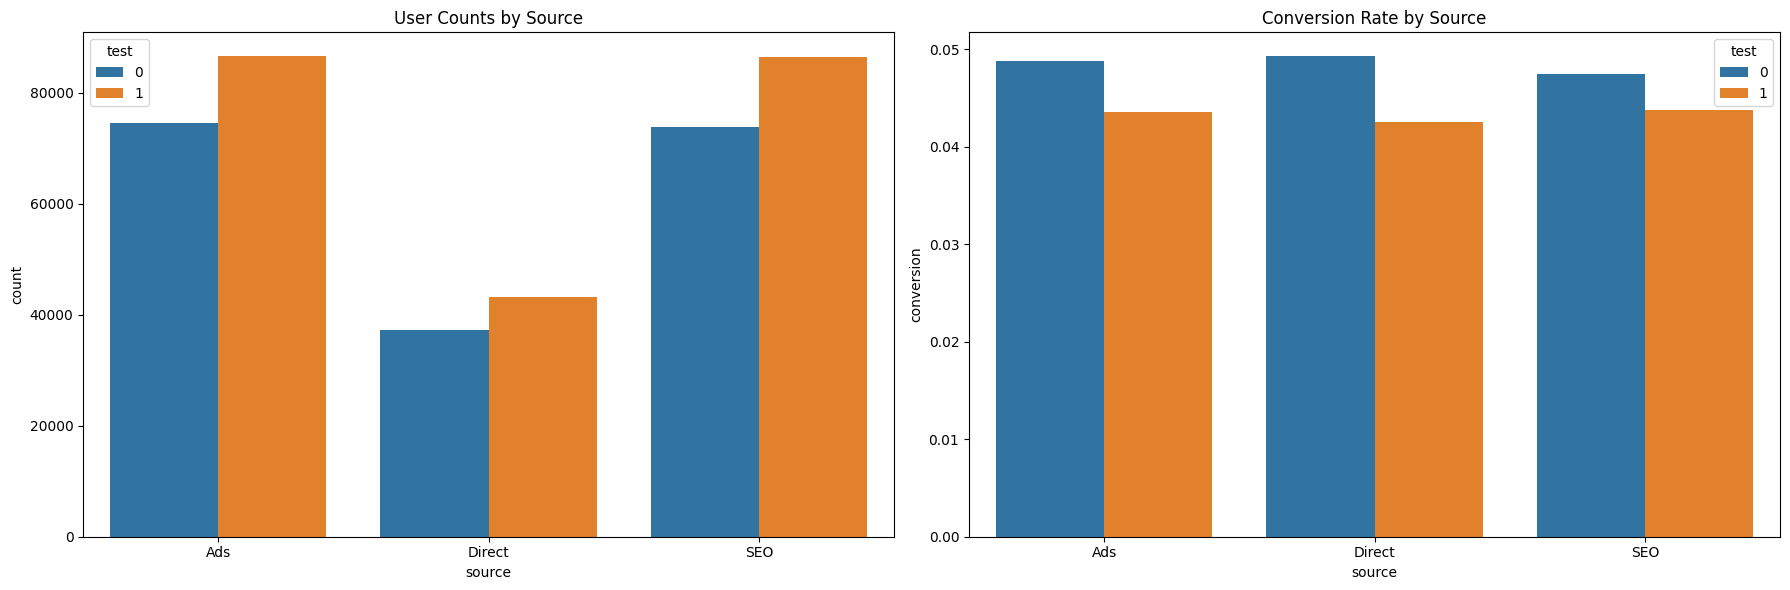

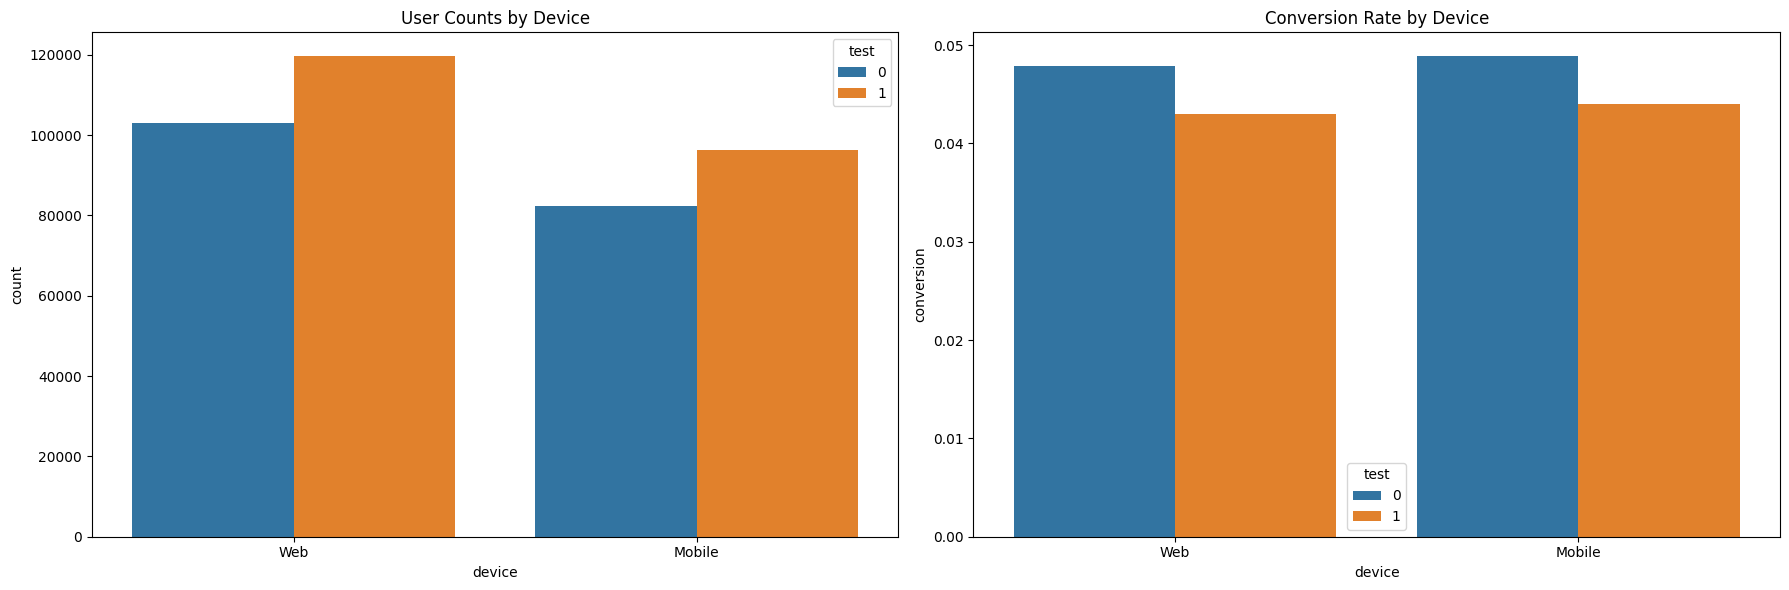

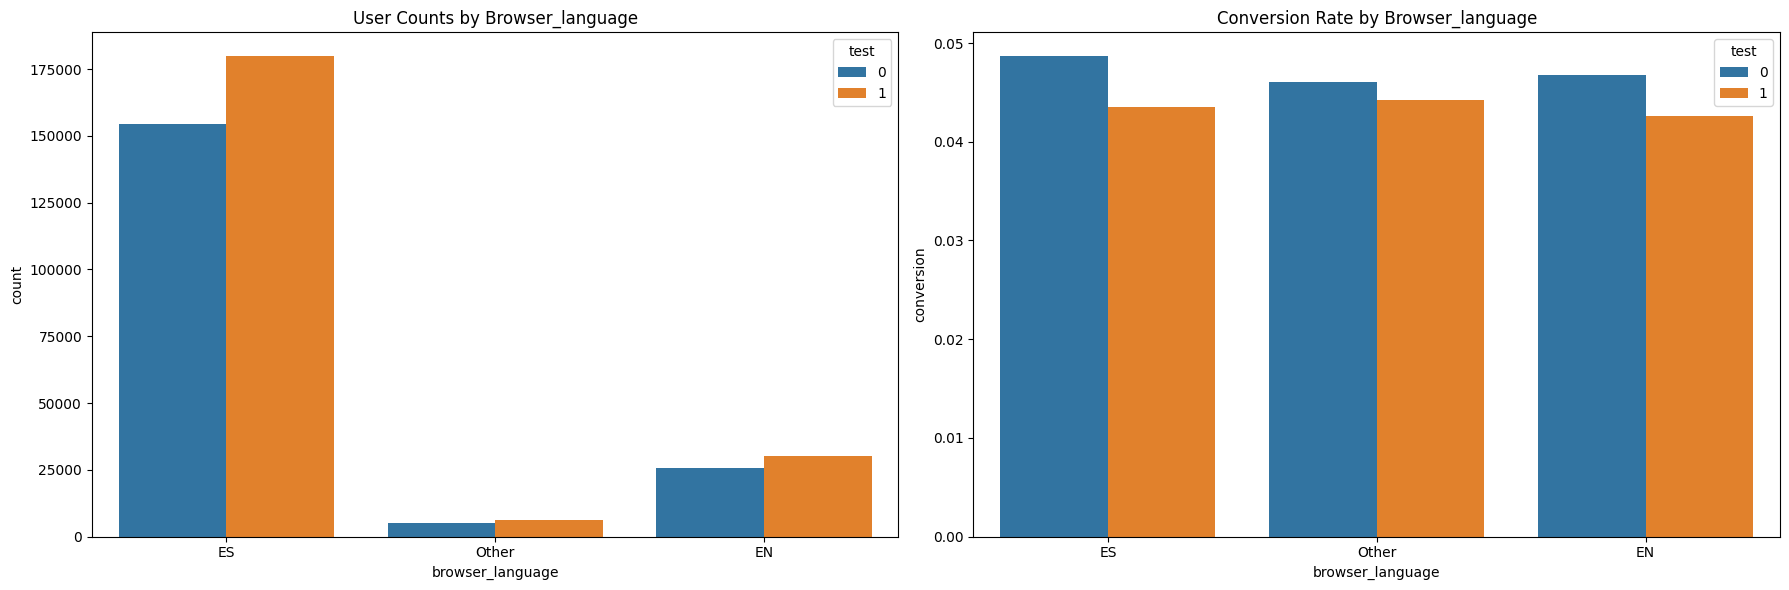

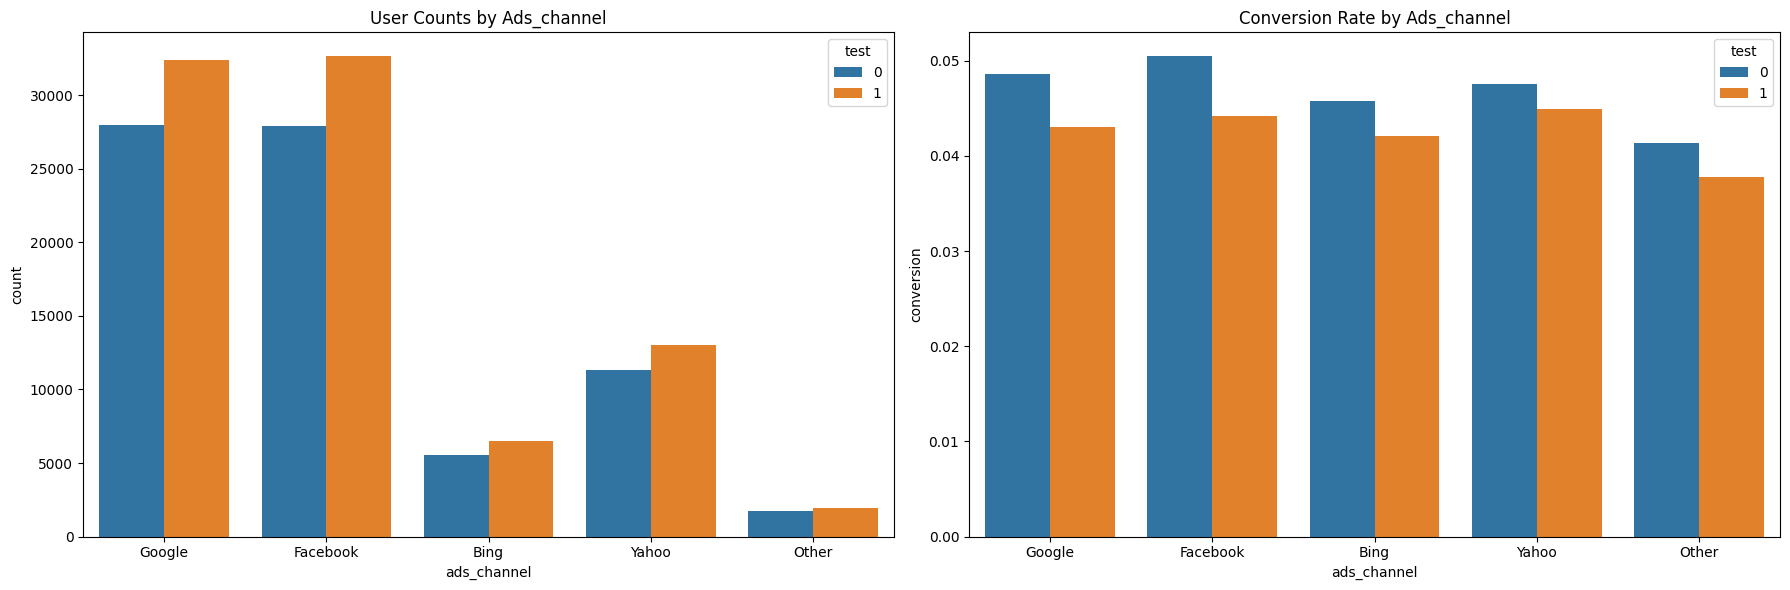

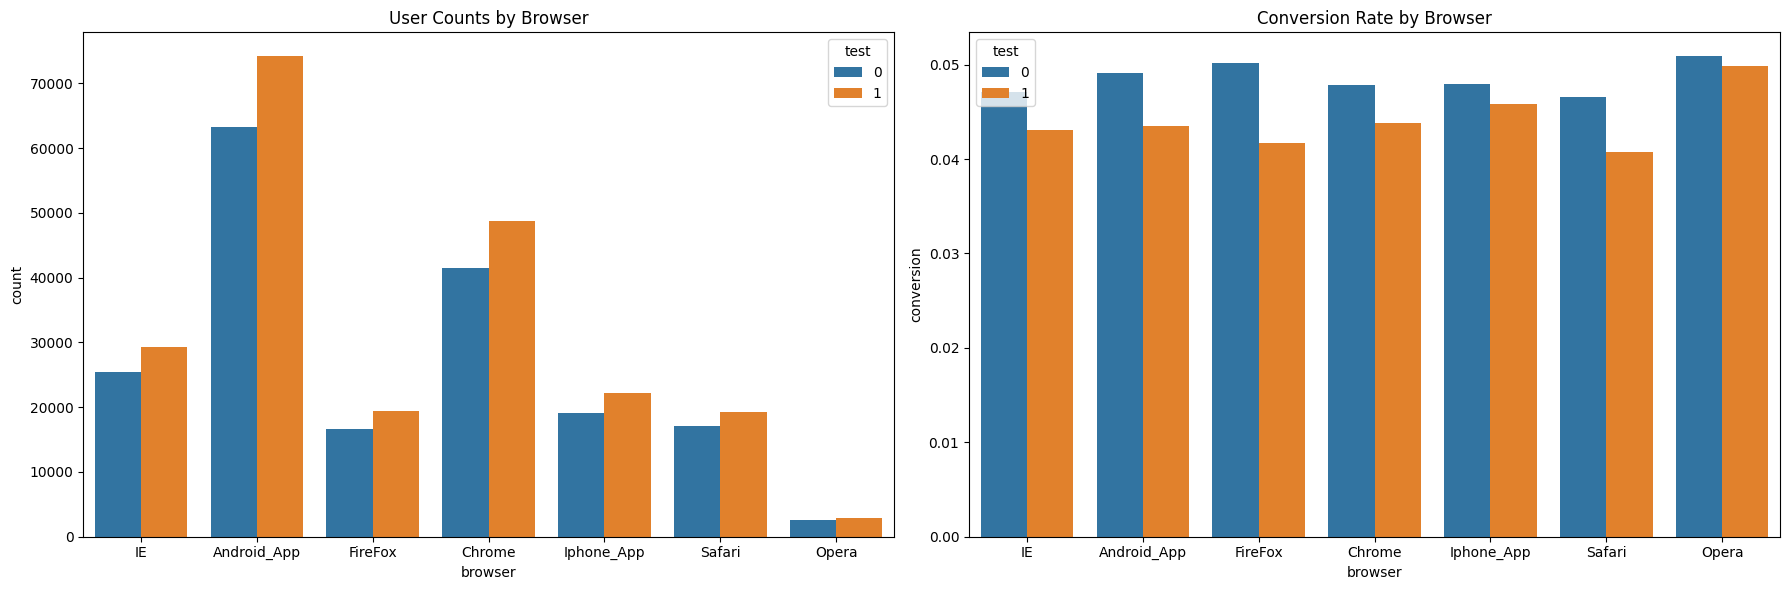

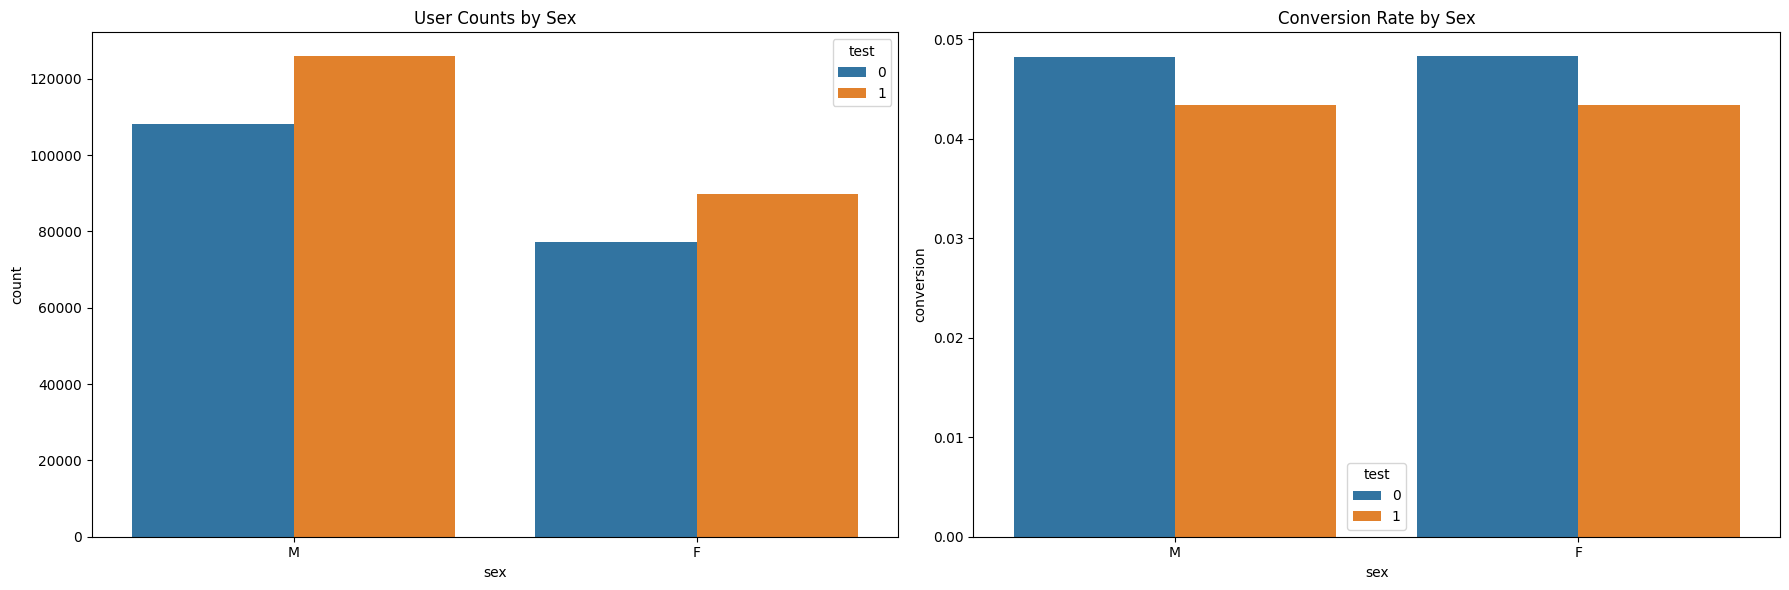

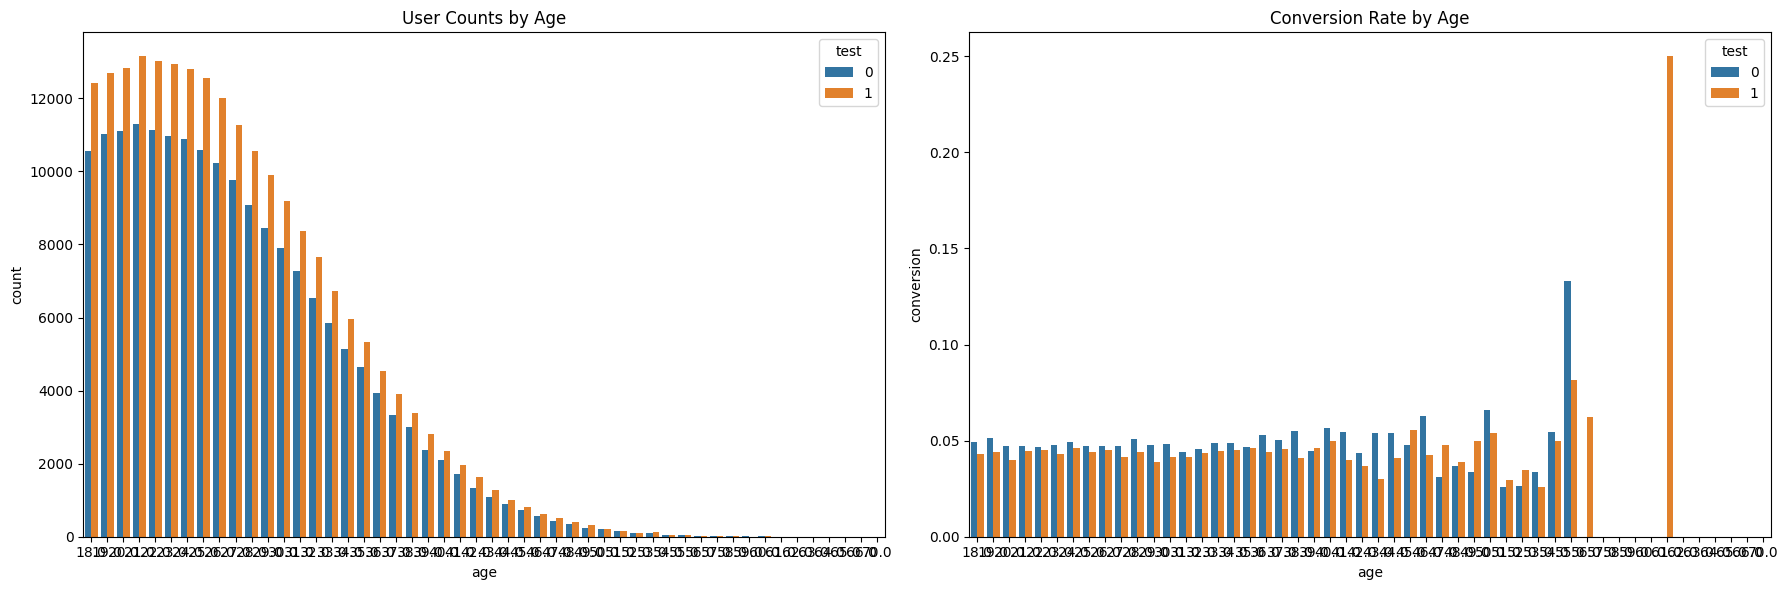

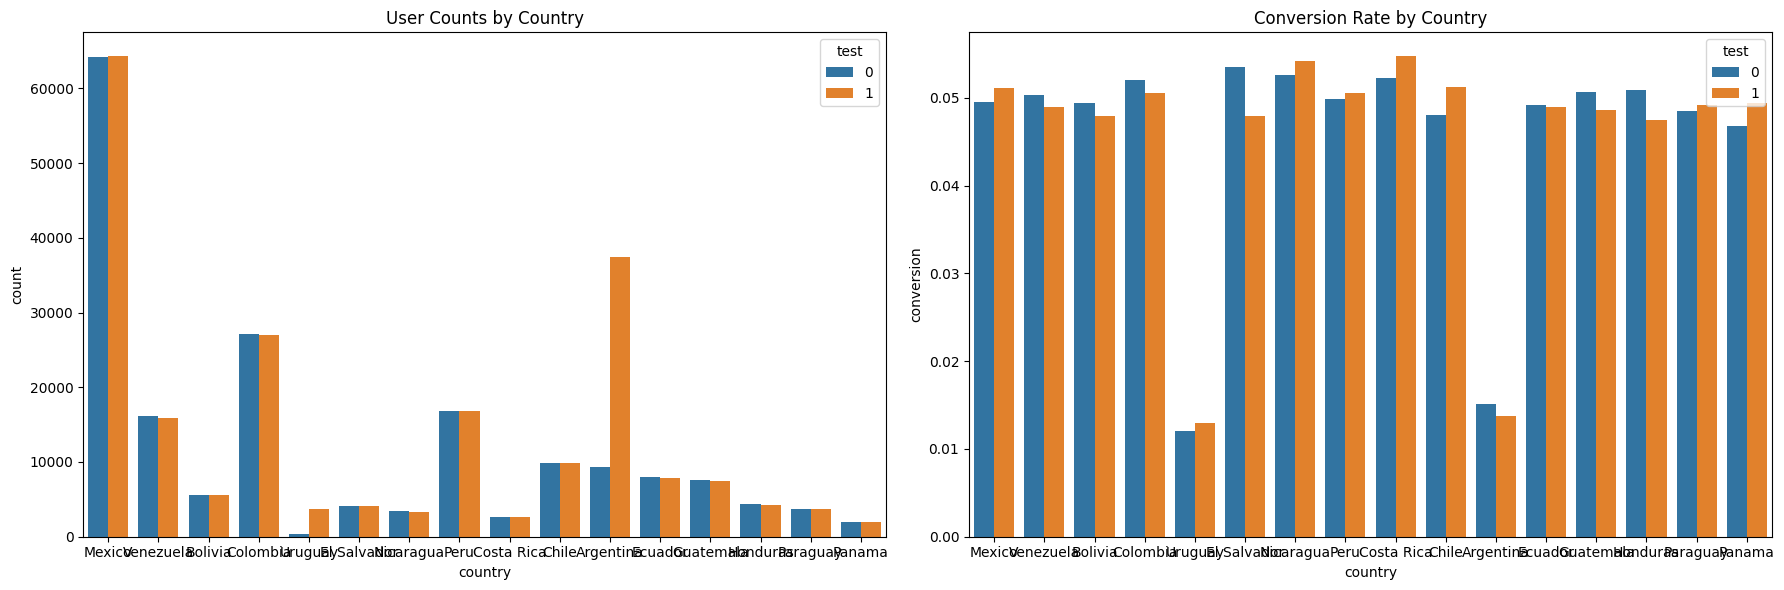

In [36]:
features = ["source", "device", "browser_language", "ads_channel",
            "browser", "sex", "age", "country"]
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    sns.countplot(data=new_data, x=feature, hue="test", ax=axes[0])
    axes[0].set_title(f"User Counts by {feature.capitalize()}")
    sns.barplot(data=new_data, x=feature, y="conversion", hue="test", errorbar=None, ax=axes[1])
    axes[1].set_title(f"Conversion Rate by {feature.capitalize()}")
    plt.tight_layout()
    plt.show()

In [37]:
country_stats = new_data.dropna(subset=['country']).groupby(['country', 'test'])['conversion'].agg(['mean', 'count']).unstack('test')
results = []
for country in data['country'].dropna().unique():
    test_vals = data[(data['country'] == country) & (data['test'] == 1)]['conversion']
    cont_vals = data[(data['country'] == country) & (data['test'] == 0)]['conversion']
    if len(test_vals) > 0 and len(cont_vals) > 0:
        p_val = ttest_ind(test_vals, cont_vals, equal_var=False).pvalue
        results.append([country, test_vals.mean(), cont_vals.mean(), p_val])

df_results = pd.DataFrame(results, columns=["Country", "Test Rate", "Control Rate", "P-Value"])
print(df_results.to_string(index=False))

    Country  Test Rate  Control Rate  P-Value
     Mexico   0.051186      0.049495 0.165544
  Venezuela   0.048978      0.050344 0.573702
    Bolivia   0.047901      0.049369 0.718885
   Colombia   0.050571      0.052089 0.423719
    Uruguay   0.012907      0.012048 0.879764
El Salvador   0.047947      0.053554 0.248127
  Nicaragua   0.054177      0.052647 0.780400
       Peru   0.050604      0.049914 0.771953
 Costa Rica   0.054738      0.052256 0.687876
      Chile   0.051295      0.048107 0.302848
  Argentina   0.013725      0.015071 0.335147
    Ecuador   0.048988      0.049154 0.961512
  Guatemala   0.048647      0.050643 0.572107
   Honduras   0.047540      0.050906 0.471463
   Paraguay   0.049229      0.048493 0.883697
     Panama   0.049370      0.046796 0.705327


## The test did not make a meaningful difference in any country and the conversion rates were very similar between test and control groups showing no clear impact
